In [1]:
!pip install import_ipynb

In [2]:
#Python Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import import_ipynb


#ipynb files
from DataPreProcessing import DataPreProcessing, InputsAndLabels
from BuildGraph import BuildGraph
import Configuration
import pandas as pd
from GraphNeuralNetwork import GCN

importing Jupyter notebook from DataPreProcessing.ipynb
importing Jupyter notebook from BuildGraph.ipynb
importing Jupyter notebook from GraphNeuralNetwork.ipynb


In [3]:
#Prepare Training Data
dataPreProcessing = DataPreProcessing()
df = dataPreProcessing.process_specific_fields()
df = dataPreProcessing.one_hot_encode()
df = dataPreProcessing.normalize()
dataPreProcessing.save_processed_file()

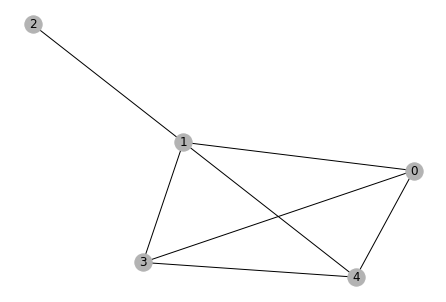

In [8]:
#Build Graph Based on Cosine Similarity, Assign Features to nodes and Show the graph
df = pd.read_csv(Configuration.PROCESSED_FILE_PATH, nrows=5)
buildGraph = BuildGraph(df)
graph = buildGraph.build_graph()
graph = buildGraph.assign_features_to_nodes()
buildGraph.show_graph()

In [5]:
#Prepare Input/Output Data For Training
inputsAndLabels = InputsAndLabels(df)
inputs = inputsAndLabels.get_inputs()
labels = inputsAndLabels.get_labels()
labeled_nodes = torch.tensor([i for i in range(len(df))])

In [6]:
#Create Neural Network
net = GCN(inputs.shape[1], 10, 2)

In [7]:
optimizer = torch.optim.Adam(net.parameters(), lr=Configuration.LEARNING_RATE)
all_logits = []
for epoch in range(Configuration.TRAINING_EPOCHS):
    logits = net(graph, inputs)
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 0.6281
Epoch 1 | Loss: 0.6198
Epoch 2 | Loss: 0.6128
Epoch 3 | Loss: 0.6073
Epoch 4 | Loss: 0.6044
Epoch 5 | Loss: 0.6030
Epoch 6 | Loss: 0.6014
Epoch 7 | Loss: 0.5991
Epoch 8 | Loss: 0.5962
Epoch 9 | Loss: 0.5930
Epoch 10 | Loss: 0.5897
Epoch 11 | Loss: 0.5866
Epoch 12 | Loss: 0.5838
Epoch 13 | Loss: 0.5813
Epoch 14 | Loss: 0.5790
Epoch 15 | Loss: 0.5766
Epoch 16 | Loss: 0.5739
Epoch 17 | Loss: 0.5709
Epoch 18 | Loss: 0.5678
Epoch 19 | Loss: 0.5646
Epoch 20 | Loss: 0.5616
Epoch 21 | Loss: 0.5587
Epoch 22 | Loss: 0.5559
Epoch 23 | Loss: 0.5530
Epoch 24 | Loss: 0.5500
Epoch 25 | Loss: 0.5469
Epoch 26 | Loss: 0.5437
Epoch 27 | Loss: 0.5404
Epoch 28 | Loss: 0.5372
Epoch 29 | Loss: 0.5347
Epoch 30 | Loss: 0.5316
Epoch 31 | Loss: 0.5279
Epoch 32 | Loss: 0.5248
Epoch 33 | Loss: 0.5217
Epoch 34 | Loss: 0.5186
Epoch 35 | Loss: 0.5153
Epoch 36 | Loss: 0.5120
Epoch 37 | Loss: 0.5095
Epoch 38 | Loss: 0.5067
Epoch 39 | Loss: 0.5034
Epoch 40 | Loss: 0.4999
Epoch 41 | Loss: 0.4978
Ep

Epoch 394 | Loss: 0.1572
Epoch 395 | Loss: 0.1569
Epoch 396 | Loss: 0.1567
Epoch 397 | Loss: 0.1563
Epoch 398 | Loss: 0.1567
Epoch 399 | Loss: 0.1559
Epoch 400 | Loss: 0.1557
Epoch 401 | Loss: 0.1554
Epoch 402 | Loss: 0.1552
Epoch 403 | Loss: 0.1549
Epoch 404 | Loss: 0.1547
Epoch 405 | Loss: 0.1544
Epoch 406 | Loss: 0.1540
Epoch 407 | Loss: 0.1537
Epoch 408 | Loss: 0.1534
Epoch 409 | Loss: 0.1531
Epoch 410 | Loss: 0.1527
Epoch 411 | Loss: 0.1524
Epoch 412 | Loss: 0.1520
Epoch 413 | Loss: 0.1516
Epoch 414 | Loss: 0.1513
Epoch 415 | Loss: 0.1509
Epoch 416 | Loss: 0.1506
Epoch 417 | Loss: 0.1514
Epoch 418 | Loss: 0.1501
Epoch 419 | Loss: 0.1500
Epoch 420 | Loss: 0.1498
Epoch 421 | Loss: 0.1496
Epoch 422 | Loss: 0.1495
Epoch 423 | Loss: 0.1492
Epoch 424 | Loss: 0.1490
Epoch 425 | Loss: 0.1488
Epoch 426 | Loss: 0.1485
Epoch 427 | Loss: 0.1482
Epoch 428 | Loss: 0.1480
Epoch 429 | Loss: 0.1477
Epoch 430 | Loss: 0.1474
Epoch 431 | Loss: 0.1471
Epoch 432 | Loss: 0.1468
Epoch 433 | Loss: 0.1464


Epoch 739 | Loss: 0.0933
Epoch 740 | Loss: 0.0932
Epoch 741 | Loss: 0.0930
Epoch 742 | Loss: 0.0929
Epoch 743 | Loss: 0.0927
Epoch 744 | Loss: 0.0926
Epoch 745 | Loss: 0.0925
Epoch 746 | Loss: 0.0923
Epoch 747 | Loss: 0.0922
Epoch 748 | Loss: 0.0920
Epoch 749 | Loss: 0.0920
Epoch 750 | Loss: 0.0918
Epoch 751 | Loss: 0.0918
Epoch 752 | Loss: 0.0916
Epoch 753 | Loss: 0.0915
Epoch 754 | Loss: 0.0914
Epoch 755 | Loss: 0.0913
Epoch 756 | Loss: 0.0912
Epoch 757 | Loss: 0.0911
Epoch 758 | Loss: 0.0910
Epoch 759 | Loss: 0.0909
Epoch 760 | Loss: 0.0908
Epoch 761 | Loss: 0.0907
Epoch 762 | Loss: 0.0906
Epoch 763 | Loss: 0.0904
Epoch 764 | Loss: 0.0903
Epoch 765 | Loss: 0.0902
Epoch 766 | Loss: 0.0901
Epoch 767 | Loss: 0.0899
Epoch 768 | Loss: 0.0898
Epoch 769 | Loss: 0.0897
Epoch 770 | Loss: 0.0896
Epoch 771 | Loss: 0.0895
Epoch 772 | Loss: 0.0894
Epoch 773 | Loss: 0.0893
Epoch 774 | Loss: 0.0892
Epoch 775 | Loss: 0.0891
Epoch 776 | Loss: 0.0890
Epoch 777 | Loss: 0.0889
Epoch 778 | Loss: 0.0888


Epoch 1078 | Loss: 0.0617
Epoch 1079 | Loss: 0.0616
Epoch 1080 | Loss: 0.0616
Epoch 1081 | Loss: 0.0615
Epoch 1082 | Loss: 0.0614
Epoch 1083 | Loss: 0.0614
Epoch 1084 | Loss: 0.0613
Epoch 1085 | Loss: 0.0612
Epoch 1086 | Loss: 0.0612
Epoch 1087 | Loss: 0.0611
Epoch 1088 | Loss: 0.0610
Epoch 1089 | Loss: 0.0609
Epoch 1090 | Loss: 0.0609
Epoch 1091 | Loss: 0.0608
Epoch 1092 | Loss: 0.0607
Epoch 1093 | Loss: 0.0607
Epoch 1094 | Loss: 0.0606
Epoch 1095 | Loss: 0.0605
Epoch 1096 | Loss: 0.0604
Epoch 1097 | Loss: 0.0604
Epoch 1098 | Loss: 0.0603
Epoch 1099 | Loss: 0.0602
Epoch 1100 | Loss: 0.0602
Epoch 1101 | Loss: 0.0601
Epoch 1102 | Loss: 0.0601
Epoch 1103 | Loss: 0.0600
Epoch 1104 | Loss: 0.0599
Epoch 1105 | Loss: 0.0599
Epoch 1106 | Loss: 0.0598
Epoch 1107 | Loss: 0.0597
Epoch 1108 | Loss: 0.0597
Epoch 1109 | Loss: 0.0596
Epoch 1110 | Loss: 0.0596
Epoch 1111 | Loss: 0.0595
Epoch 1112 | Loss: 0.0594
Epoch 1113 | Loss: 0.0594
Epoch 1114 | Loss: 0.0593
Epoch 1115 | Loss: 0.0592
Epoch 1116 |

Epoch 1409 | Loss: 0.0437
Epoch 1410 | Loss: 0.0437
Epoch 1411 | Loss: 0.0437
Epoch 1412 | Loss: 0.0436
Epoch 1413 | Loss: 0.0436
Epoch 1414 | Loss: 0.0435
Epoch 1415 | Loss: 0.0435
Epoch 1416 | Loss: 0.0434
Epoch 1417 | Loss: 0.0434
Epoch 1418 | Loss: 0.0433
Epoch 1419 | Loss: 0.0433
Epoch 1420 | Loss: 0.0433
Epoch 1421 | Loss: 0.0432
Epoch 1422 | Loss: 0.0432
Epoch 1423 | Loss: 0.0431
Epoch 1424 | Loss: 0.0431
Epoch 1425 | Loss: 0.0430
Epoch 1426 | Loss: 0.0430
Epoch 1427 | Loss: 0.0430
Epoch 1428 | Loss: 0.0429
Epoch 1429 | Loss: 0.0429
Epoch 1430 | Loss: 0.0428
Epoch 1431 | Loss: 0.0428
Epoch 1432 | Loss: 0.0427
Epoch 1433 | Loss: 0.0427
Epoch 1434 | Loss: 0.0427
Epoch 1435 | Loss: 0.0426
Epoch 1436 | Loss: 0.0426
Epoch 1437 | Loss: 0.0425
Epoch 1438 | Loss: 0.0425
Epoch 1439 | Loss: 0.0424
Epoch 1440 | Loss: 0.0424
Epoch 1441 | Loss: 0.0423
Epoch 1442 | Loss: 0.0423
Epoch 1443 | Loss: 0.0423
Epoch 1444 | Loss: 0.0422
Epoch 1445 | Loss: 0.0422
Epoch 1446 | Loss: 0.0421
Epoch 1447 |

Epoch 1777 | Loss: 0.0312
Epoch 1778 | Loss: 0.0312
Epoch 1779 | Loss: 0.0311
Epoch 1780 | Loss: 0.0311
Epoch 1781 | Loss: 0.0311
Epoch 1782 | Loss: 0.0311
Epoch 1783 | Loss: 0.0310
Epoch 1784 | Loss: 0.0310
Epoch 1785 | Loss: 0.0310
Epoch 1786 | Loss: 0.0309
Epoch 1787 | Loss: 0.0309
Epoch 1788 | Loss: 0.0309
Epoch 1789 | Loss: 0.0309
Epoch 1790 | Loss: 0.0309
Epoch 1791 | Loss: 0.0308
Epoch 1792 | Loss: 0.0308
Epoch 1793 | Loss: 0.0308
Epoch 1794 | Loss: 0.0308
Epoch 1795 | Loss: 0.0307
Epoch 1796 | Loss: 0.0307
Epoch 1797 | Loss: 0.0307
Epoch 1798 | Loss: 0.0307
Epoch 1799 | Loss: 0.0306
Epoch 1800 | Loss: 0.0306
Epoch 1801 | Loss: 0.0306
Epoch 1802 | Loss: 0.0306
Epoch 1803 | Loss: 0.0306
Epoch 1804 | Loss: 0.0305
Epoch 1805 | Loss: 0.0305
Epoch 1806 | Loss: 0.0305
Epoch 1807 | Loss: 0.0305
Epoch 1808 | Loss: 0.0304
Epoch 1809 | Loss: 0.0304
Epoch 1810 | Loss: 0.0304
Epoch 1811 | Loss: 0.0303
Epoch 1812 | Loss: 0.0303
Epoch 1813 | Loss: 0.0303
Epoch 1814 | Loss: 0.0303
Epoch 1815 |